In [2]:
import numpy as np
import matplotlib.pyplot as plt
import chainer.optimizers as Opt
import chainer.functions as F
import chainer.links as L
from chainer import Variable,Chain,config

import princess as ohm

In [2]:
D = 100
ndata = np.linspace(-5.0,5.0,D)


In [3]:
N=1
xdata=ndata.reshape(D,N).astype(np.float32)
tdata=(np.sin(ndata)+np.sin(2.0*ndata))\
.reshape(D,N).astype(np.float32)


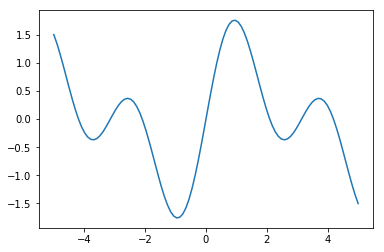

In [4]:
plt.plot(xdata,tdata)
plt.show()

In [5]:
C=1
H=20
NN=Chain(l1=L.Linear(N,H),l2=L.Linear(H,C),bnorm1=L.BatchNormalization(H))

def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    y=NN.l2(h)
    return y

In [6]:
print(NN.l1.W.data)

[[-0.6486283 ]
 [-0.07535767]
 [-0.16227578]
 [-1.4505949 ]
 [ 0.18662073]
 [ 0.34616   ]
 [ 1.0782027 ]
 [ 0.78104645]
 [ 1.511219  ]
 [ 0.58289903]
 [ 0.17560194]
 [-0.81037146]
 [-0.8625797 ]
 [-1.4519104 ]
 [ 2.2599707 ]
 [-1.1822275 ]
 [-0.4060855 ]
 [-0.9718253 ]
 [-0.08963341]
 [ 0.6216029 ]]


In [7]:
print(NN.l1.W.grad)

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [8]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

In [9]:
train_loss=[]
test_loss=[]

Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata)
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

In [10]:
def learning_regression(model,optNN,data,result,T=10):
        for time in range(T):
            config.train = True
            optNN.target.cleargrads()
            ytrain = model(data[0])
            loss_train = F.mean_squared_error(ytrain,data[2])
            loss_train.backward()
            optNN.update()
            
            config.train = False
            ytest = model(data[1])
            loss_test = F.mean_squared_error(ytest,data[3])
            result[0].append(loss_train.data)
            result[1].append(loss_test.data)

In [11]:
ohm.learning_regression(model,optNN,data,result,1000)

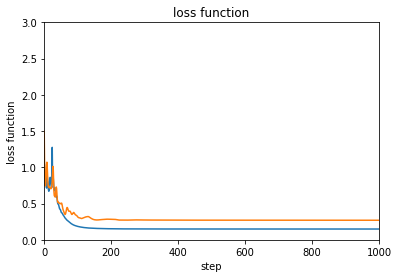

In [12]:
ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,3.0)

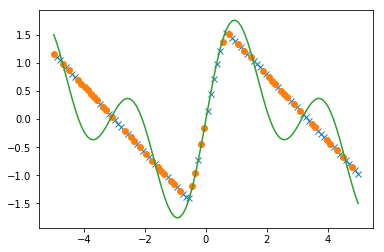

In [15]:
config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(xtrain,ytrain,marker='x',linestyle='None')
plt.plot(xtest,ytest,marker='o',linestyle='None')
plt.plot(xdata,tdata)
plt.show()

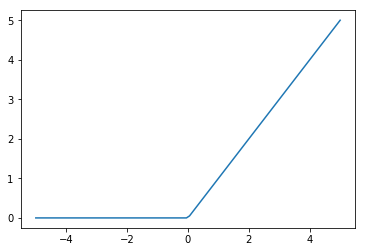

In [16]:
ydata=F.relu(xdata).data
plt.plot(xdata,ydata)
plt.show()

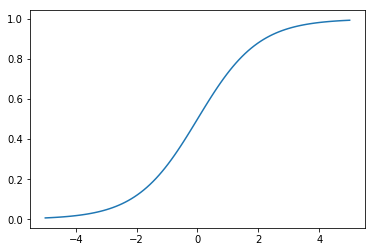

In [17]:
ydata=F.sigmoid(xdata).data
plt.plot(xdata,ydata)
plt.show()

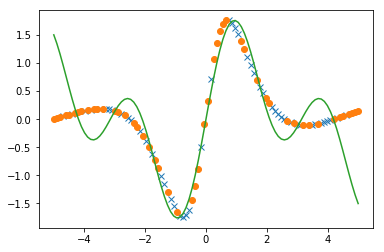

In [18]:
C=1
H=20
NN=Chain(l1=L.Linear(N,H),l2=L.Linear(H,C),bnorm1=L.BatchNormalization(H))

def model(x):
    h=NN.l1(x)
    h=F.sigmoid(h)
    h=NN.bnorm1(h)
    y=NN.l2(h)
    return y

optNN = Opt.MomentumSGD()
optNN.setup(NN)
train_loss=[]
test_loss=[]

Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata)
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

ohm.learning_regression(model,optNN,data,result,1000)

config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(xtrain,ytrain,marker='x',linestyle='None')
plt.plot(xtest,ytest,marker='o',linestyle='None')
plt.plot(xdata,tdata)
plt.show()

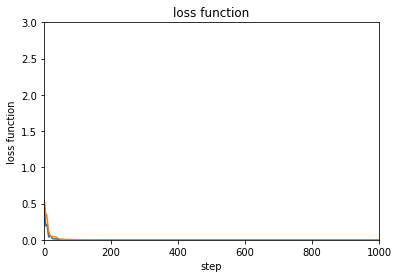

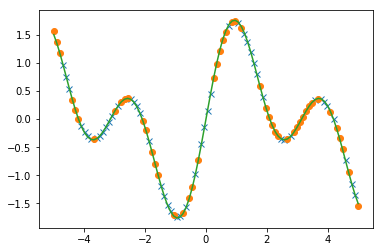

In [20]:
C=1
H=20
NN=Chain(l1=L.Linear(N,H),l2=L.Linear(H,C),bnorm1=L.BatchNormalization(H))

def model(x):
    h=NN.l1(x)
    h=F.sin(h)
    h=NN.bnorm1(h)
    y=NN.l2(h)
    return y

optNN = Opt.MomentumSGD()
optNN.setup(NN)
train_loss=[]
test_loss=[]

Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata)
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

ohm.learning_regression(model,optNN,data,result,1000)

ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,3.0)

config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(xtrain,ytrain,marker='x',linestyle='None')
plt.plot(xtest,ytest,marker='o',linestyle='None')
plt.plot(xdata,tdata)
plt.show()

In [22]:
C=1
H=20
layers={}
layers['l1']=L.Linear(N,H)
layers['l2']=L.Linear(H,C)
layers['bnorm1']=L.BatchNormalization(H)

In [23]:
NN = Chain(**layers)

In [26]:
C=1
H1=5
H2=5
H3=5
layers={}
layers['l1']=L.Linear(N,H1)
layers['l2']=L.Linear(H1,H2)
layers['l3']=L.Linear(H2,H3)
layers['l4']=L.Linear(H3,C)
layers['bnorm1']=L.BatchNormalization(H1)
layers['bnorm2']=L.BatchNormalization(H2)
layers['bnorm3']=L.BatchNormalization(H3)
NN=Chain(**layers)

def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    h=NN.l2(h)
    h=F.relu(h)
    h=NN.bnorm2(h)
    h=NN.l3(h)
    h=F.relu(h)
    h=NN.bnorm3(h)
    y=NN.l4(h)
    return y

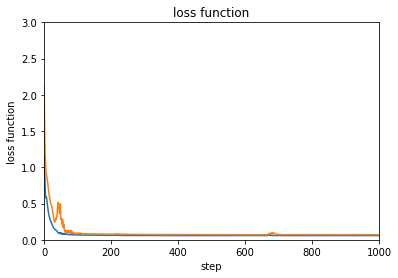

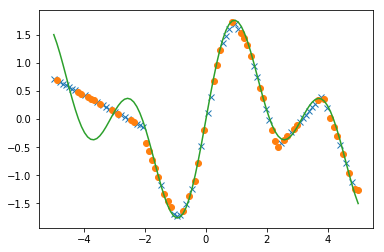

In [27]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)
train_loss=[]
test_loss=[]

Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata)
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

ohm.learning_regression(model,optNN,data,result,1000)

ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,3.0)

config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(xtrain,ytrain,marker='x',linestyle='None')
plt.plot(xtest,ytest,marker='o',linestyle='None')
plt.plot(xdata,tdata)
plt.show()

In [28]:
import pandas as pd

In [29]:
data=pd.read_csv('ファイルの置き場所.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x83 in position 0: invalid start byte

In [30]:
data=data.values.tolist()
data=np.array(data).astype(np.float32)
xdata=data[:,0:N]

AttributeError: 'list' object has no attribute 'values'

In [3]:
M=100
time_data=np.linspace(0.0,10.0,M)
value_data=np.sin(time_data)+2.0*np.sin(2.0*time_data)
N=2
xdata=[]
tdata=[]
for k in range(N,M):
    xdata.append(value_data[k-N:k])
    tdata.append(value_data[k])
xdata= np.array(xdata).astype(np.float32)
tdata=np.array(tdata).reshape(M-N,1).astype(np.float32)
D,N=xdata.shape
print(D,N)

98 2


In [4]:
C=1
H1=5
H2=5
H3=5
layers={}
layers['l1']=L.Linear(N,H1)
layers['l2']=L.Linear(H1,H2)
layers['l3']=L.Linear(H2,H3)
layers['l4']=L.Linear(H3,C)
layers['bnorm1']=L.BatchNormalization(H1)
layers['bnorm2']=L.BatchNormalization(H2)
layers['bnorm3']=L.BatchNormalization(H3)
NN=Chain(**layers)

def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    h=NN.l2(h)
    h=F.relu(h)
    h=NN.bnorm2(h)
    h=NN.l3(h)
    h=F.relu(h)
    h=NN.bnorm3(h)
    y=NN.l4(h)
    return y

In [5]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

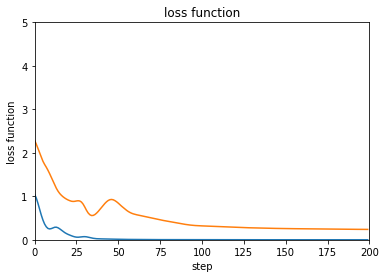

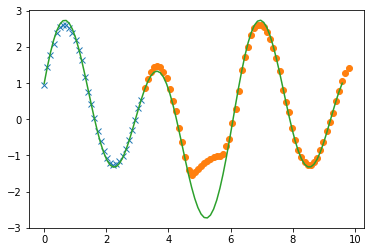

In [6]:
train_loss=[]
test_loss=[]

Dtrain = D//3
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata,'off')
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

ohm.learning_regression(model,optNN,data,result,200)

ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,5.0)

config.train = False
ytrain = model(xtrain).data
ytest = model(xtest).data
plt.plot(time_data[0:Dtrain],ytrain,marker='x',linestyle='None')
plt.plot(time_data[Dtrain:D],ytest,marker='o',linestyle='None')
plt.plot(time_data[0:D-N],value_data[N:D])
plt.show()

In [7]:
import pandas_datareader.data as web
import datetime as dt

In [8]:
start = dt.date(2005,1,1)
end = dt.date(2007,12,31)
web_data=web.DataReader('AMZN','yahoo',start, end)

c:\users\xakar\appdata\local\programs\python\python37-32\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


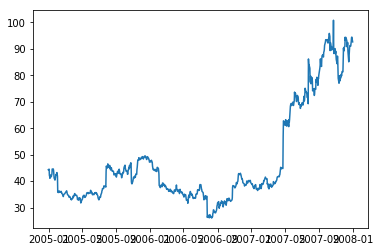

In [9]:
plt.plot(web_data['Close'])
plt.show()

In [10]:
value_data = web_data['Close']
M=len(value_data)
N=2
xdata=[]
tdata=[]
for k in range(N,M):
    xdata.append(value_data[k-N:k])
    tdata.append(value_data[k])
xdata = np.array(xdata).astype(np.float32)
tdata = np.array(tdata).reshape(len(tdata),1).astype(np.float32)
D,N=xdata.shape
print(D,N)

753 2


In [11]:
C=1
H1=5
H2=5
H3=5
layers={}
layers['l1']=L.Linear(N,H1)
layers['l2']=L.Linear(H1,H2)
layers['l3']=L.Linear(H2,H3)
layers['l4']=L.Linear(H3,C)
layers['bnorm1']=L.BatchNormalization(H1)
layers['bnorm2']=L.BatchNormalization(H2)
layers['bnorm3']=L.BatchNormalization(H3)
NN=Chain(**layers)

def model(x):
    h=NN.l1(x)
    h=F.relu(h)
    h=NN.bnorm1(h)
    h=NN.l2(h)
    h=F.relu(h)
    h=NN.bnorm2(h)
    h=NN.l3(h)
    h=F.relu(h)
    h=NN.bnorm3(h)
    y=NN.l4(h)
    return y

In [12]:
optNN = Opt.MomentumSGD()
optNN.setup(NN)

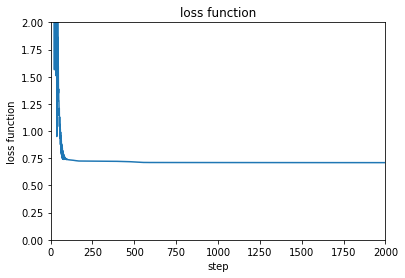

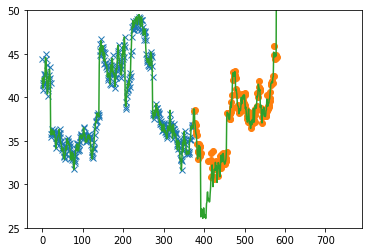

In [13]:
train_loss=[]
test_loss=[]

Dtrain = D//2
xtrain,xtest,ttrain,ttest = ohm.data_divide(Dtrain,D,xdata,tdata,'off')
data = [xtrain,xtest,ttrain,ttest]
result = [train_loss,test_loss]

ohm.learning_regression(model,optNN,data,result,2000)

ohm.plot_result2(result[0],result[1],'loss function','step','loss function',0.0,2.0)

ytrain = model(xtrain).data
ytest = model(xtest).data
time_data = np.arange(M-N)
plt.plot(time_data[0:Dtrain],ytrain,marker='x',linestyle='None')
plt.plot(time_data[Dtrain:D],ytest,marker='o',linestyle='None')
plt.plot(time_data[0:D-N],value_data[N:D])
plt.ylim([25,50])
plt.show()